### Документация по библиотекам
* https://seaborn.pydata.org/generated/seaborn.relplot.html
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html



Задача 62:

* Изобразите отношение households к population с помощью точечного графика
* Визуализировать longitude по отношения к median_house_value, используя линейный график
* Представить гистограмму по housing_median_age
* Изобразить гистограмму по median_house_value с оттенком housing_median_age


In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
df = pd.read_csv('S:\GeekBrains\PythonLesson\Jupyter\california_housing_train.csv')

<Axes: xlabel='households', ylabel='population'>

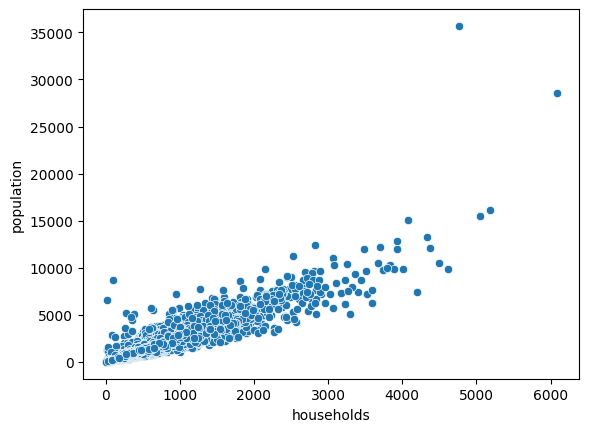

In [18]:
sns.scatterplot(data=df,x="households",y="population")

<Axes: xlabel='housing_median_age', ylabel='Count'>

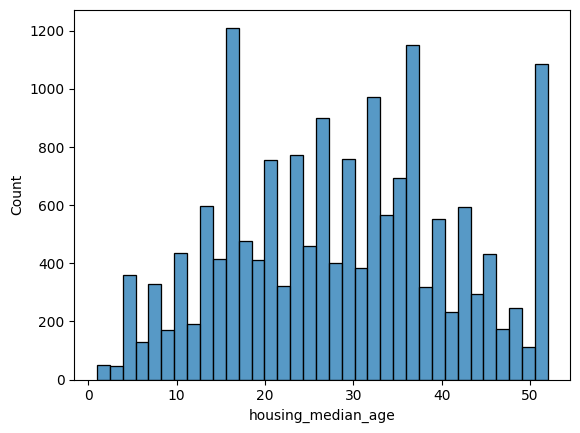

In [19]:
sns.histplot(data=df,x='housing_median_age')

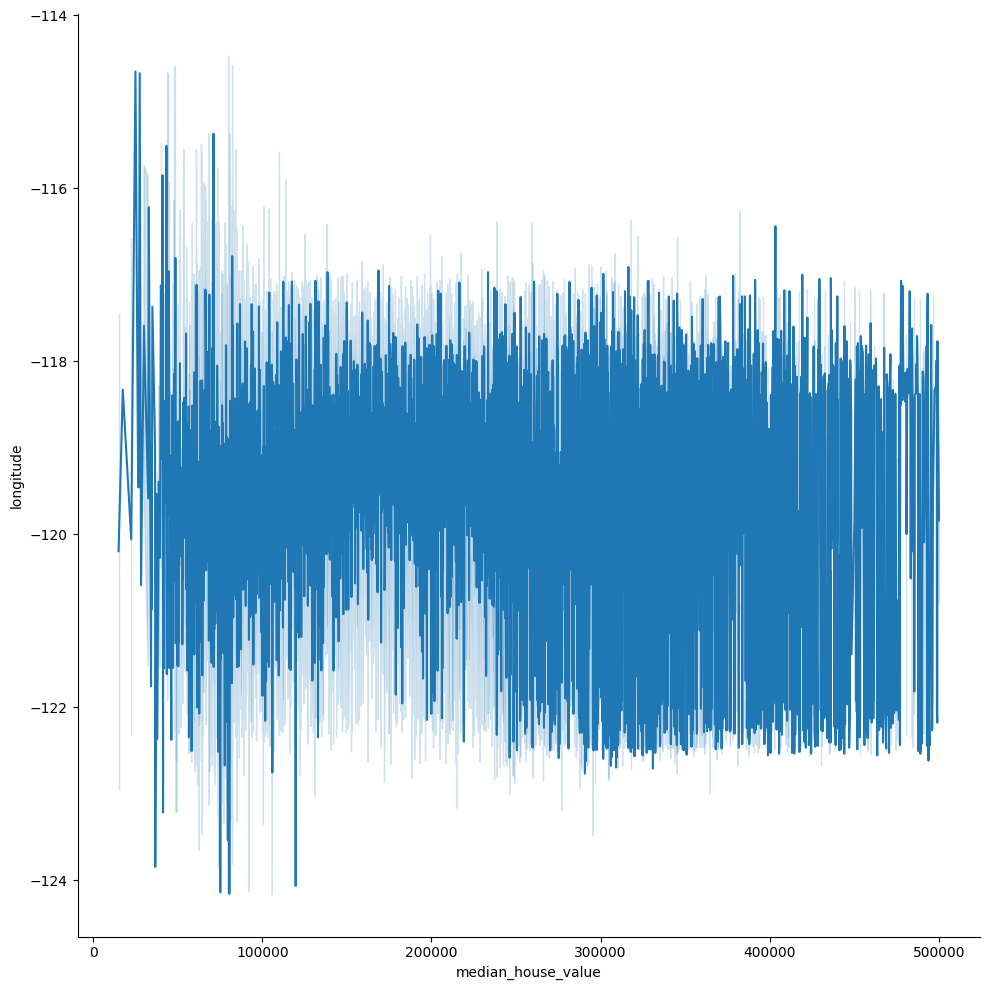

In [14]:
sns.relplot(y="longitude", x="median_house_value",kind="line",data=df,height=10)

<Axes: xlabel='median_house_value', ylabel='Count'>

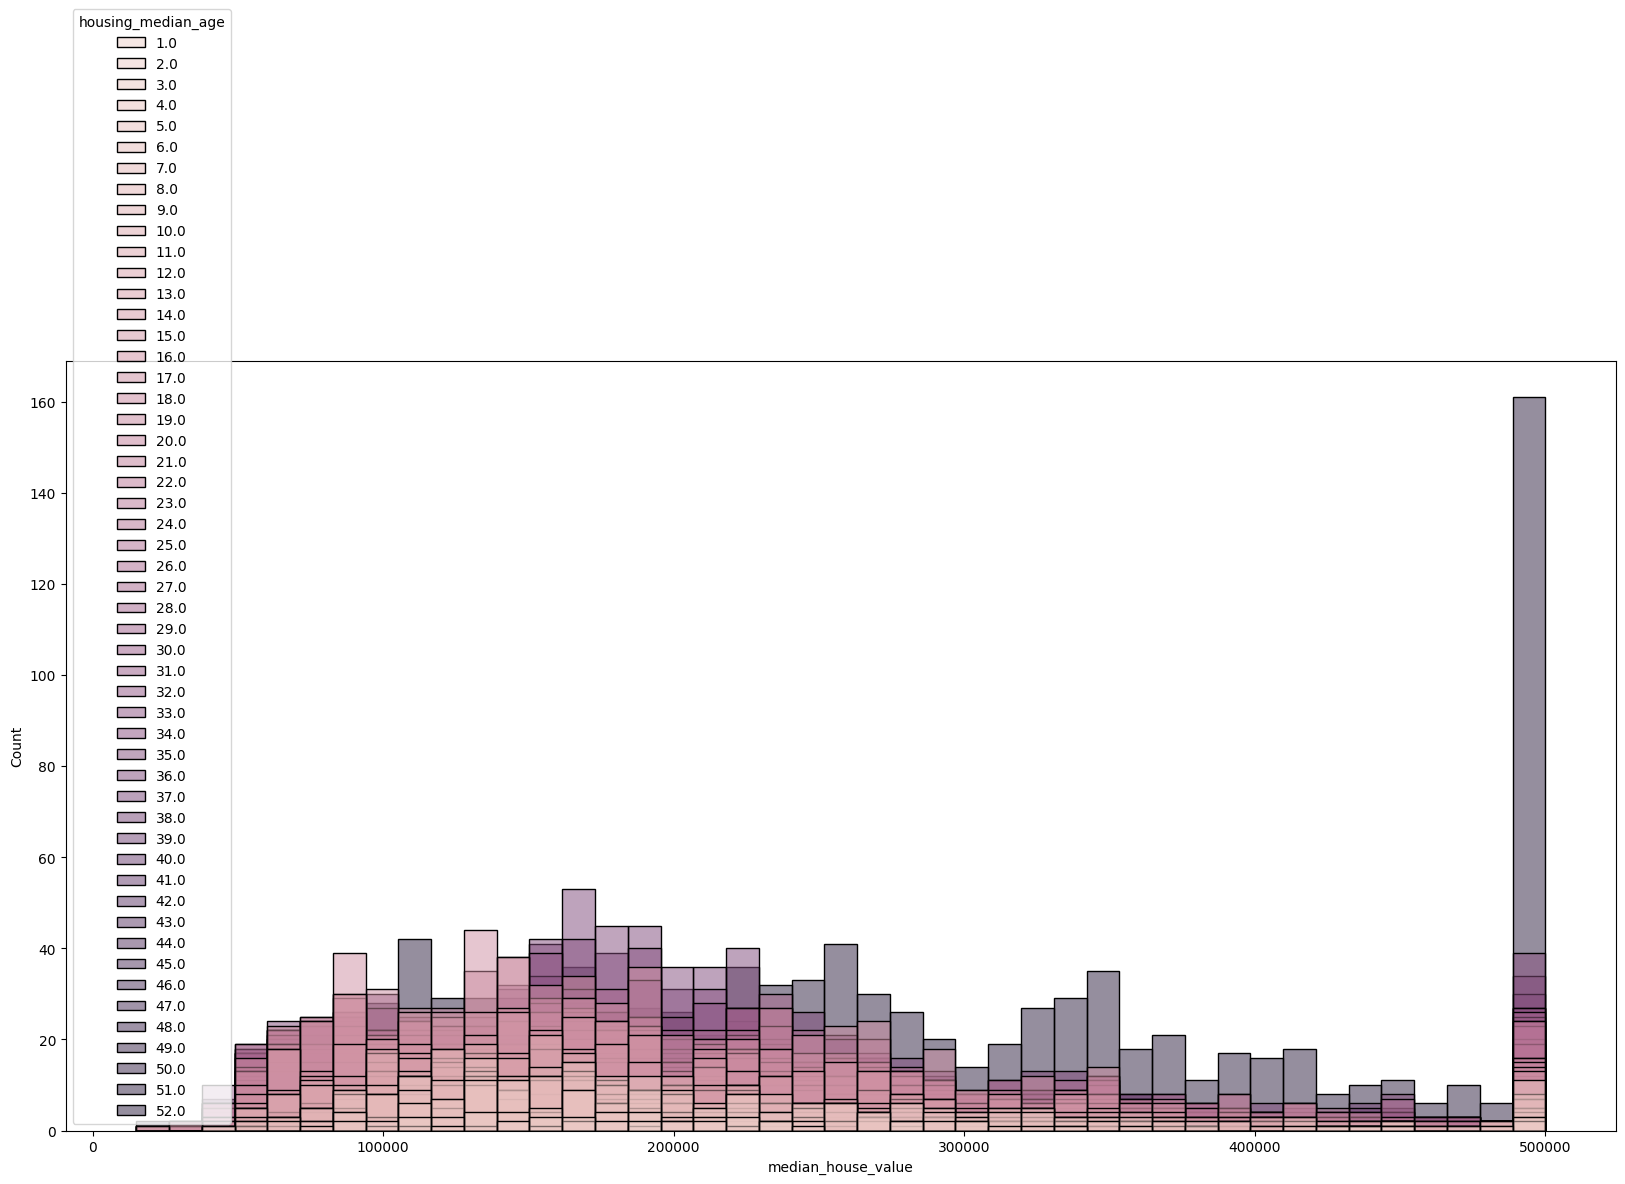

In [11]:
plt.figure(figsize=(20, 10)) # размер графика с параметрами
sns.histplot(data =df,x="median_house_value",hue = 'housing_median_age')

4 задачи EDA:
Вариация — это тенденция значений переменной изменяться от измерения к измерению.
Ковариация — это тенденция к изменению значений двух или более переменных во взаимосвязи друг с другом.

1) обнаружить паттерны и зависимости в данных
2) выдвинуть предположения их объясняющие
3) заметить аномалии и выбросы в наборе данных
4) сформулировать гипотезы для дальнейших статестических исследований

1) гистограмма используется для категориальных переменных, непрерывных переменных (чиисла, время)
2) При работе с гистограммами всегда следует исследовать различные значения ширины бинов,
поскольку разные значения ширины бинов могут выявить разные закономерности.
3) Пропущенные значения в датафрейме либо заменяются нулями или средними значениями по признаку, либо удаляется целая строка


Написать EDA для датасета про пингвинов 
- Необходимо:
1. Использовать 2-3 точечных графика
1. Применить доп измерение в точечных графиках, используя
аргументы hue, size, stile
1. Использовать PairGrid с типом графика на ваш выбор
2. Изобразить Heatmap
3. Использовать 2-3 гистограммы
* Чтобы подключить датасет с пингвинами, воспользуйтесь данным скриптом:
penguins = sns.load_dataset("penguins")
penguins.head()


In [20]:
penguins = sns.load_dataset("penguins") 

In [21]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [23]:
penguins.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

<Axes: xlabel='body_mass_g', ylabel='sex'>

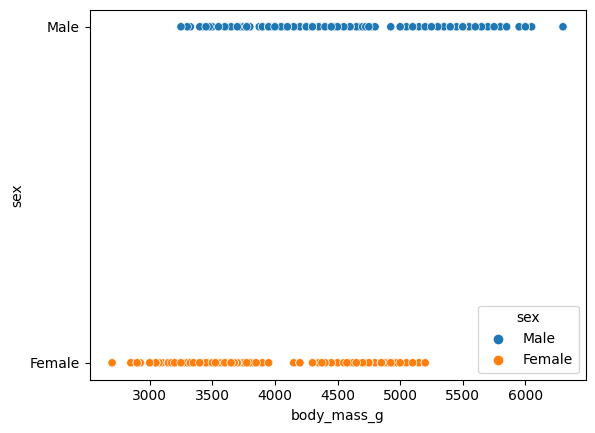

In [40]:
sns.scatterplot(data=penguins, x="body_mass_g", y="sex",hue='sex')

<Axes: xlabel='body_mass_g', ylabel='bill_depth_mm'>

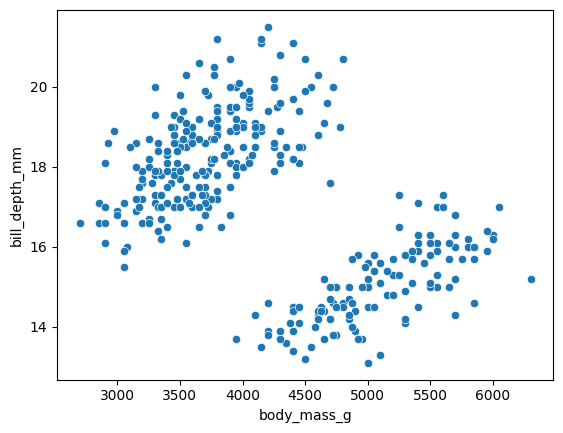

In [43]:
sns.scatterplot(data=penguins, x="body_mass_g", y="bill_depth_mm",)

<Axes: xlabel='species', ylabel='body_mass_g'>

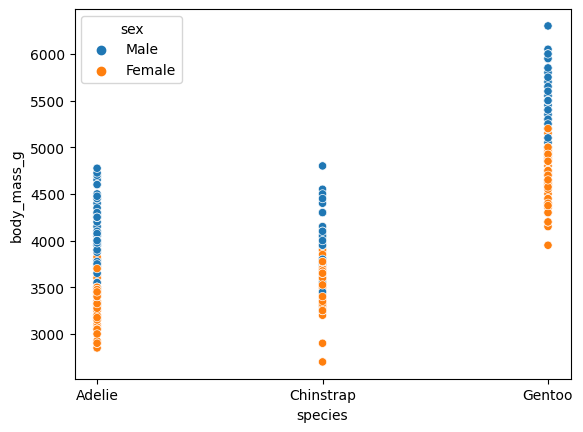

In [44]:
sns.scatterplot(data=penguins, x="species", y="body_mass_g", hue = 'sex')

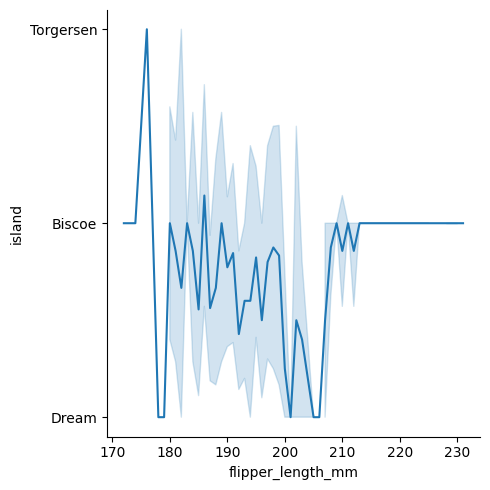

In [46]:
sns.relplot(y="island", x="flipper_length_mm",kind="line",data=penguins)

<Axes: xlabel='island', ylabel='bill_depth_mm'>

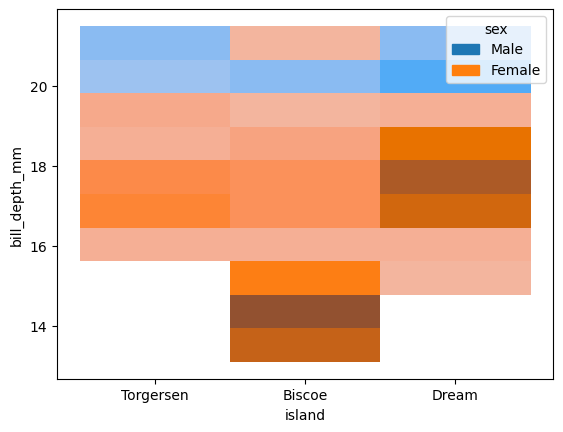

In [48]:
sns.histplot(data=penguins,x="island",y="bill_depth_mm",hue='sex')

In [50]:
penguins.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

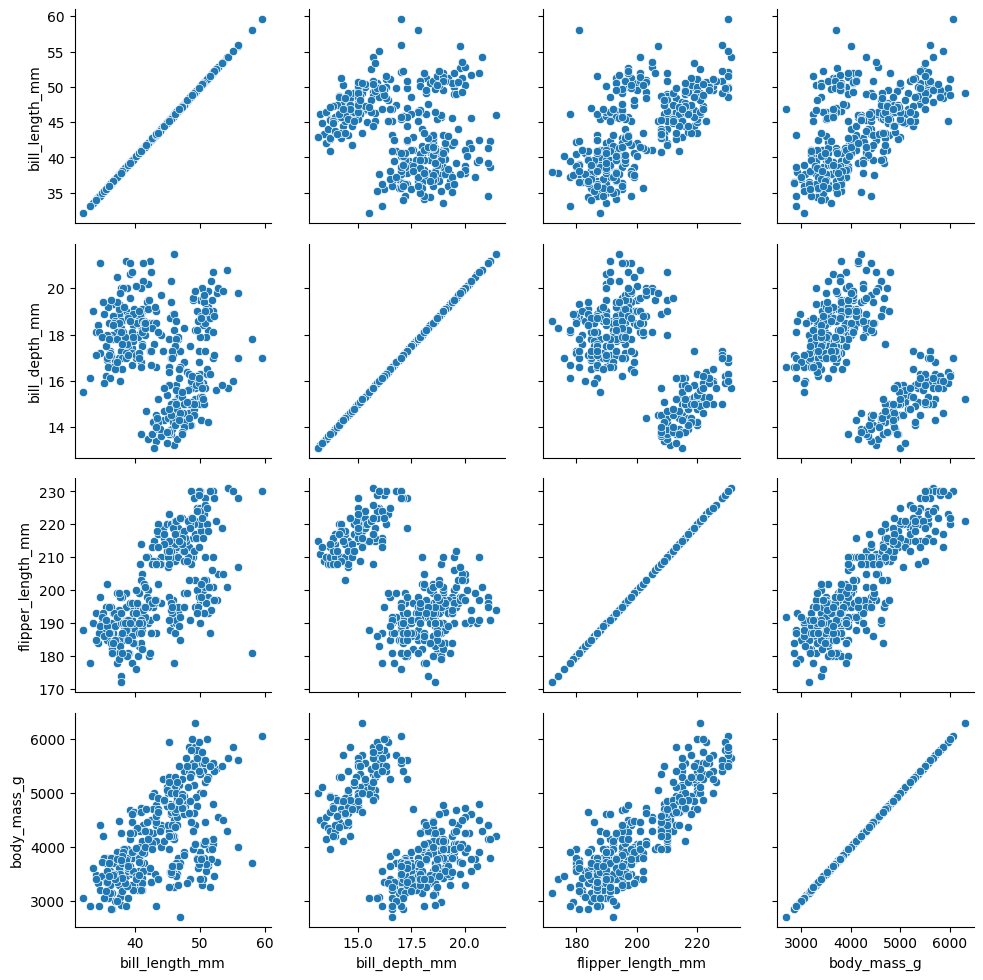

In [55]:
cols = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
g = sns.PairGrid(penguins[cols])
g.map(sns.scatterplot)


C:\Users\Dimka\AppData\Local\Temp\ipykernel_3016\4291885998.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(penguins.corr())


<Axes: >

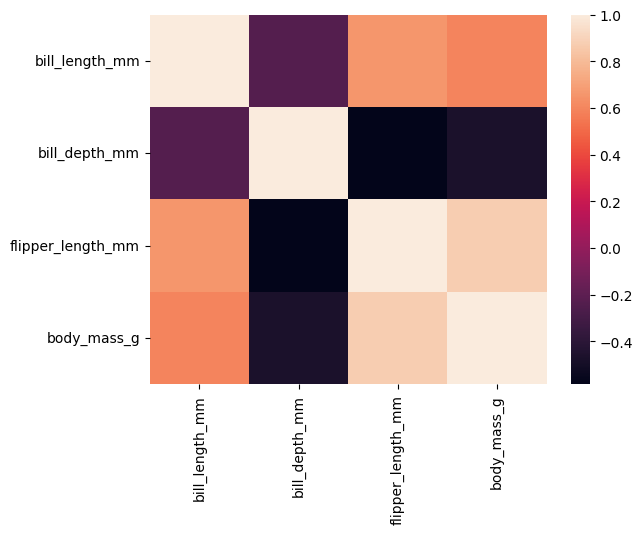

In [56]:
sns.heatmap(penguins.corr())

C:\Users\Dimka\AppData\Local\Temp\ipykernel_3016\2155244114.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(penguins.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')


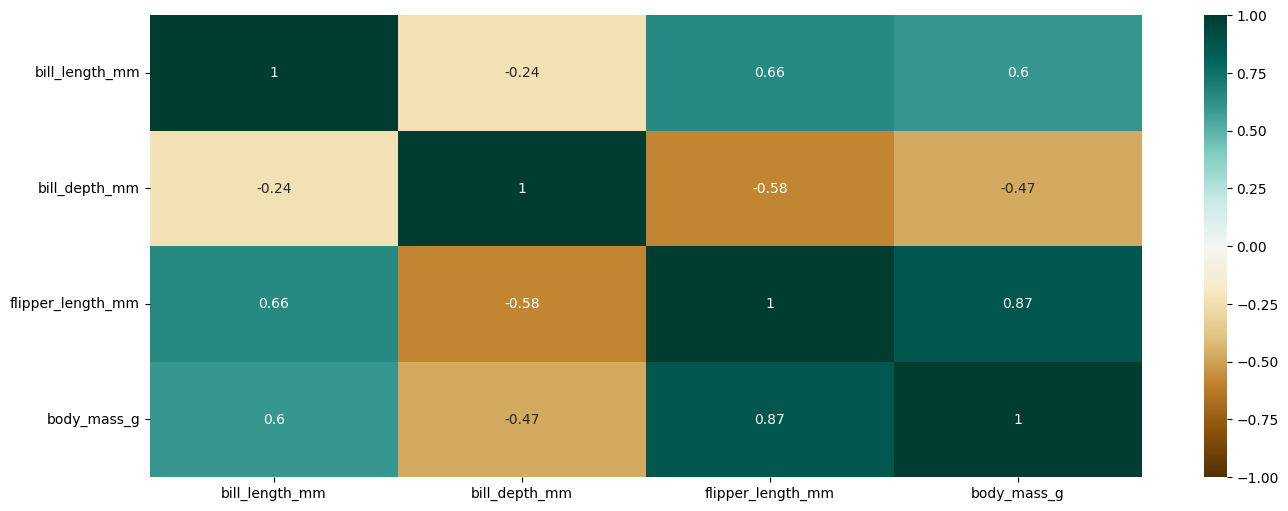

In [59]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(penguins.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')

Создать новый столбец в таблице с пингвинами, который будет отвечать за показатель длины клюва пингвина.

high - длинный(от 42)

middle - средний(от 35 до 42)

low - маленький(до 35)


In [60]:
penguins.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [73]:
penguins.loc[penguins['bill_length_mm'] > 42, 'high_group'] = 'High'
penguins.loc[(penguins['bill_length_mm'] > 35) & (penguins['bill_length_mm'] <= 42),
'high_group'] = 'middle'
penguins.loc[penguins['bill_length_mm'] < 35, 'high_group'] = 'low'

In [62]:
penguins.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex', 'high_group'],
      dtype='object')

In [63]:
penguins.high_group

0      middle
1      middle
2      middle
3         NaN
4      middle
        ...  
339       NaN
340      High
341       low
342      High
343      High
Name: high_group, Length: 344, dtype: object

Изобразить гистограмму по flipper_length_mm
с оттенком height_group. Сделать анализ

<Axes: xlabel='flipper_length_mm', ylabel='Count'>

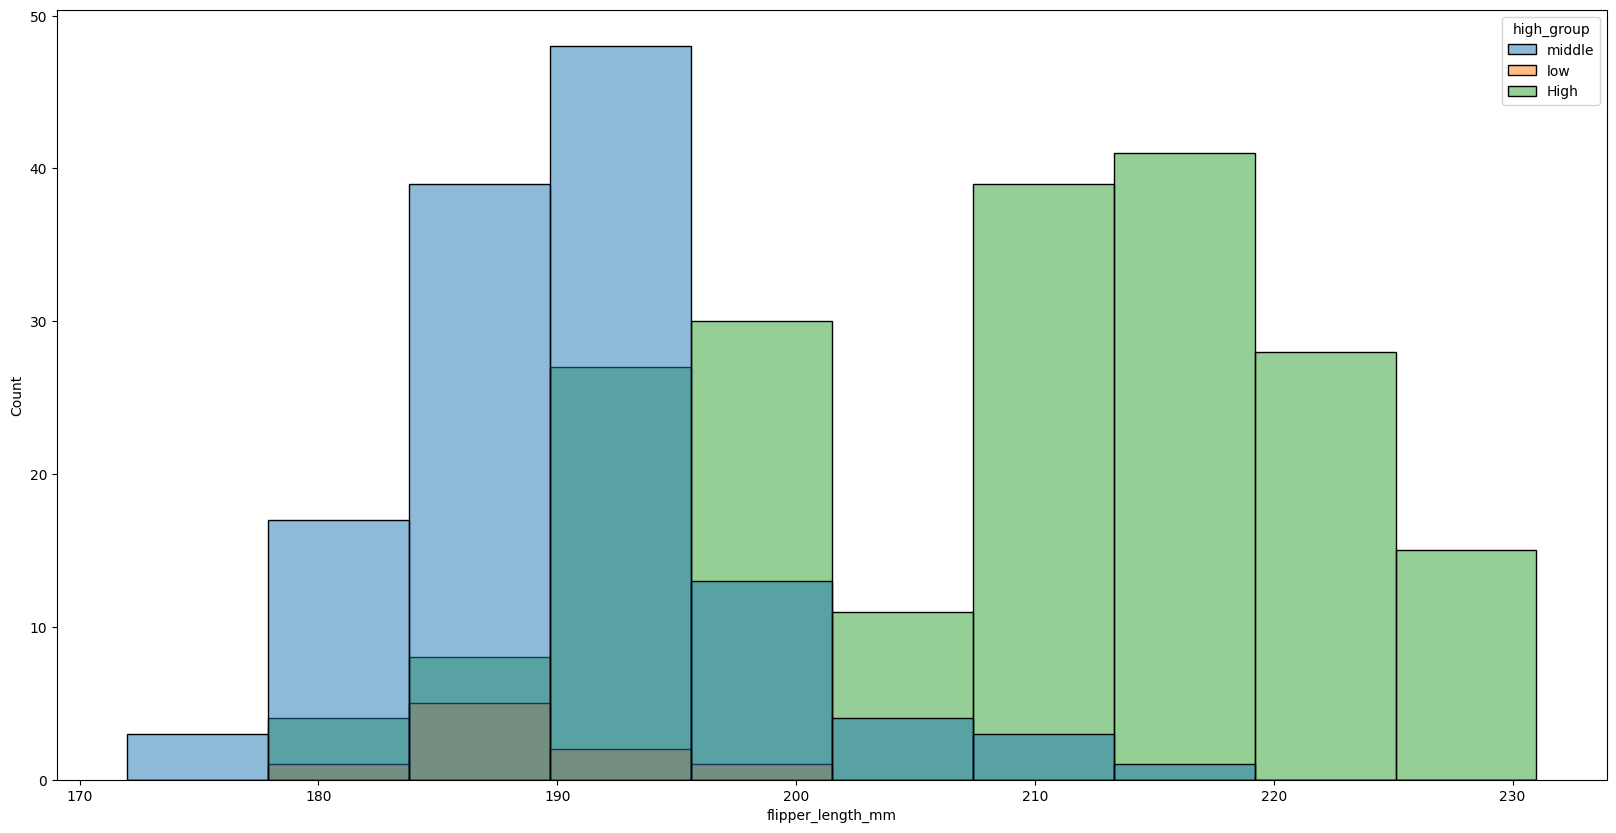

In [74]:
plt.figure(figsize=(20, 10))
sns.histplot(data=penguins, x="flipper_length_mm",hue='high_group')

ValueError: `kind` must be one of ['hist', 'kde', 'ecdf'], but 'line' was passed.